In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn import svm 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore') 
import sklearn  
import sklearn.ensemble 
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import os 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
# Mount GDrive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Change to the directory with the data


cardio = pd.read_csv('./drive/My Drive/framingham.csv')
cardio.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


To find out how many entries there are in  dataset

In [0]:
# the dimensions of the dataframe
cardio.shape

(4240, 16)

To find out if there are missing values

In [0]:
cardio.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [0]:
#counting total number of missing values
def missing_values(cardio):
    count=0
    for i in cardio.isnull().sum(axis=1):
        if i>0:
            count=count+1
    print('Total number of rows with missing values is ', count)
    print('Number of missing values is',round((count/len(cardio.index))*100), 'percent of the entire dataset')
missing_values(cardio)

Total number of rows with missing values is  582
Number of missing values is 14 percent of the entire dataset


To find out if there is duplicated data 

In [0]:
#checking for diplicate values

print("There is {} duplicated values in data frame".format(cardio.duplicated().sum()))

There is 0 duplicated values in data frame


In [0]:
#checking what are type of variables 
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


Replacing missing data with mean 

In [0]:
# Replace NaNs with mean.
cardio.cigsPerDay.replace(to_replace=np.nan, value=round(cardio.cigsPerDay.mean()), inplace=True)
cardio.BPMeds.replace(to_replace=np.nan, value=round(cardio.BPMeds.mean()), inplace=True)
cardio.totChol.replace(to_replace=np.nan, value=round(cardio.totChol.mean()), inplace=True)
cardio.BMI.replace(to_replace=np.nan, value=round(cardio.BMI.mean()), inplace=True)
cardio.glucose.replace(to_replace=np.nan, value=round(cardio.glucose.mean()), inplace=True)
cardio.heartRate.replace(to_replace=np.nan, value=round(cardio.heartRate.mean()), inplace=True)

To check statistic of numeric colums

In [0]:
cardio.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005896,0.029245,0.005896,0.310613,0.025708,236.703066,132.354599,82.897759,25.801693,75.879009,81.966981,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.881610,0.168513,0.076569,0.462799,0.158280,44.327533,22.033300,11.910394,4.070708,12.023930,22.831751,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Check distribution of columns by hystogram 

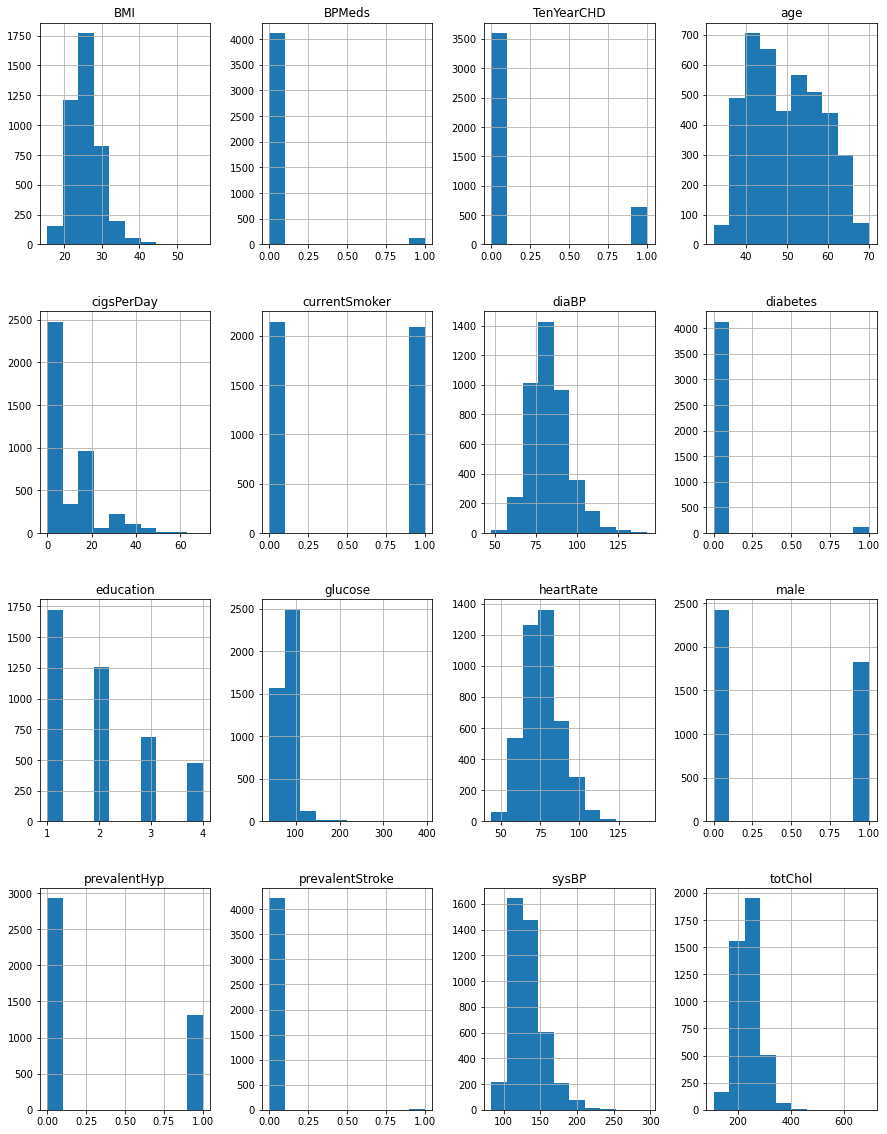

In [0]:
#histogram of all columns to see distribution 
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
cardio.hist(ax=ax)
plt.savefig('Histogram')

to check coorelation with target class

In [0]:
# correlations with target class
correlations = cardio.corr()['TenYearCHD'].drop('TenYearCHD').sort_values(ascending=False)
print(correlations)

age                0.225408
sysBP              0.216374
prevalentHyp       0.177458
diaBP              0.145112
glucose            0.120442
diabetes           0.097344
male               0.088374
BPMeds             0.086448
totChol            0.081813
BMI                0.075016
prevalentStroke    0.061823
cigsPerDay         0.057647
heartRate          0.022897
currentSmoker      0.019448
education         -0.054248
Name: TenYearCHD, dtype: float64


correlation heatmap 

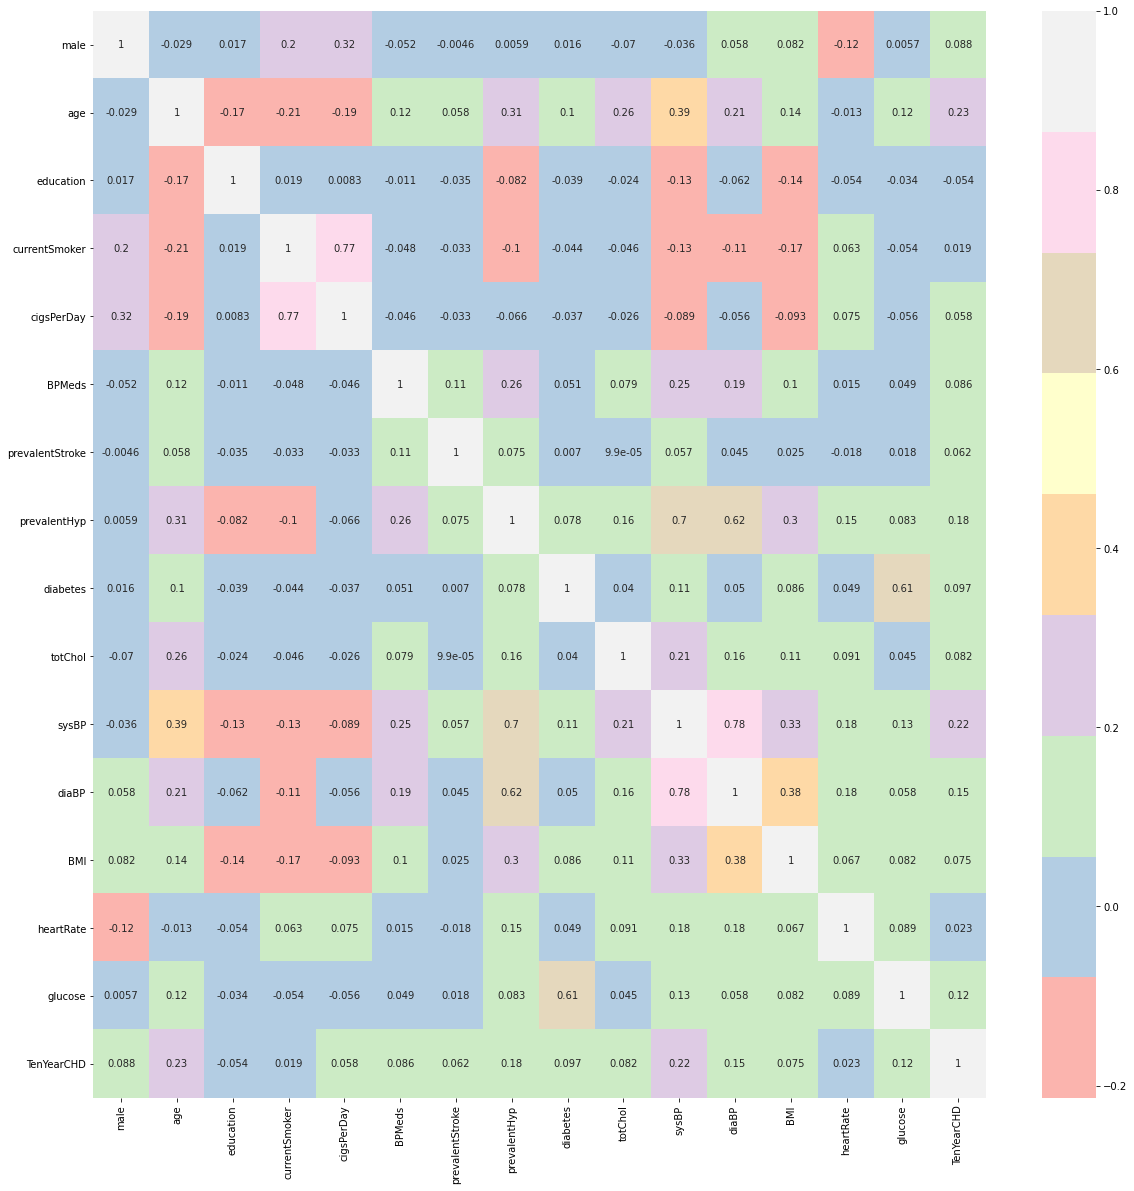

In [0]:
#correlations of each features in dataset presented as heatmap

corrmat = cardio.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(cardio[top_corr_features].corr(),annot=True,cmap="Pastel1")
plt.savefig('Heatmap Heart Disease.png')

remove column education since is irelevant

In [0]:
#to drop column that has low correlation
cardio.drop(['education'], 1, inplace=True)

Check for outliers with boxplot

Text(0, 0.5, 'glucose')

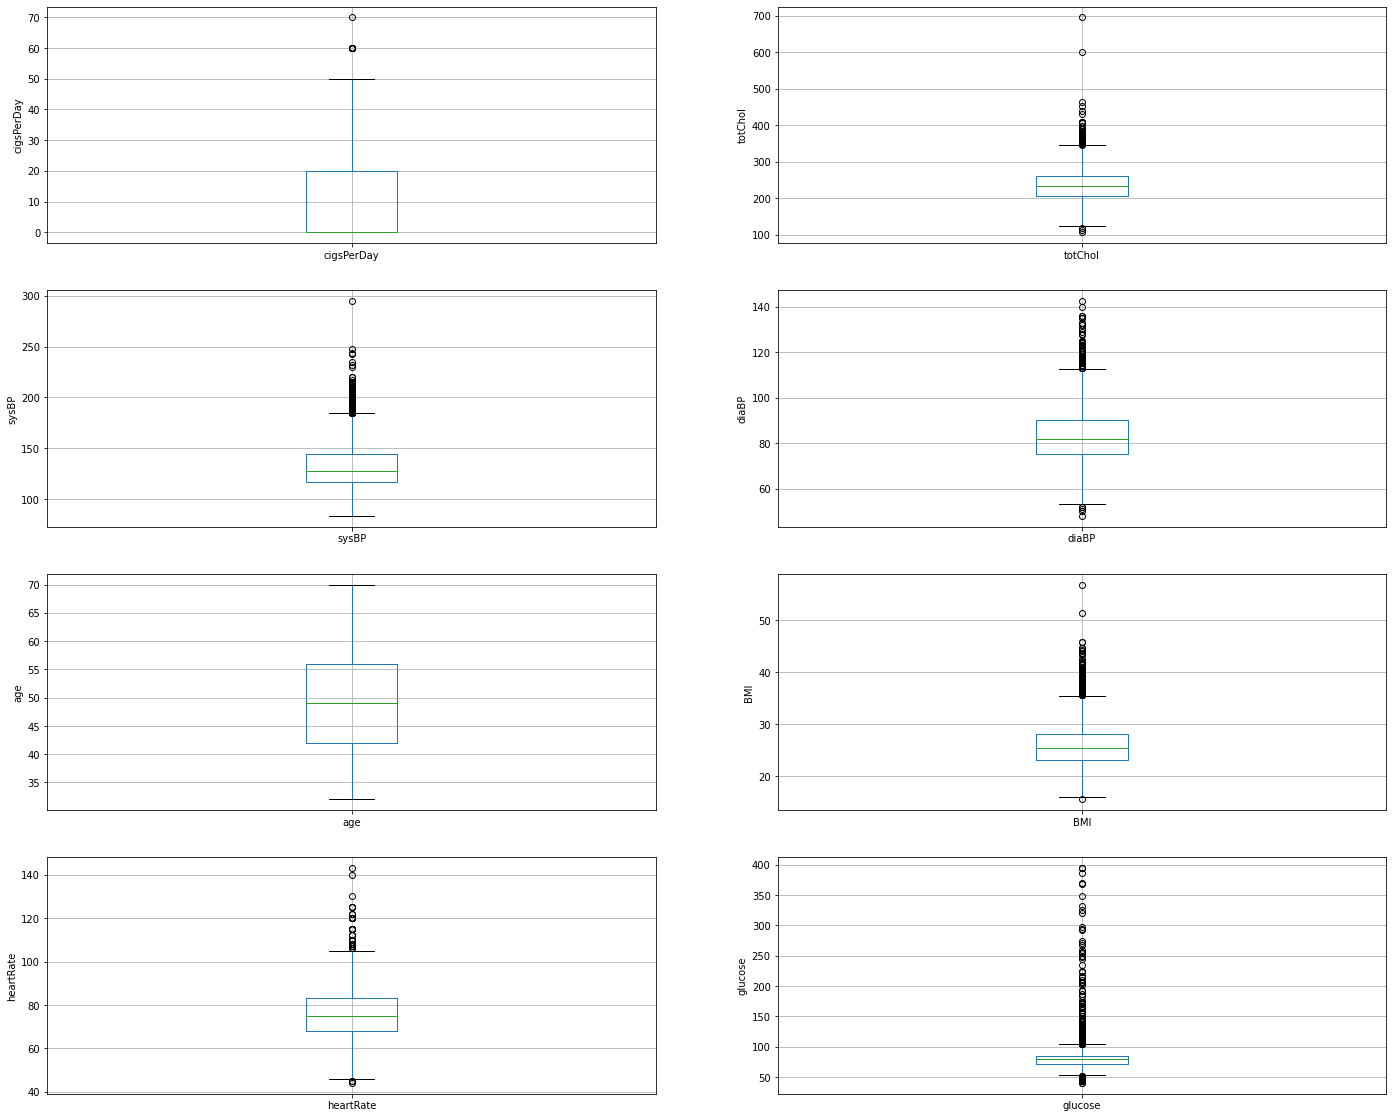

In [0]:
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = cardio.boxplot(column='cigsPerDay')
fig.set_title('')
fig.set_ylabel('cigsPerDay')


plt.subplot(4, 2, 2)
fig = cardio.boxplot(column='totChol')
fig.set_title('')
fig.set_ylabel('totChol')


plt.subplot(4, 2, 3)
fig = cardio.boxplot(column='sysBP')
fig.set_title('')
fig.set_ylabel('sysBP')


plt.subplot(4, 2, 4)
fig = cardio.boxplot(column='diaBP')
fig.set_title('')
fig.set_ylabel('diaBP')


plt.subplot(4, 2, 5)
fig = cardio.boxplot(column='age')
fig.set_title('')
fig.set_ylabel('age')


plt.subplot(4, 2, 6)
fig = cardio.boxplot(column='BMI')
fig.set_title('')
fig.set_ylabel('BMI')

plt.subplot(4, 2, 7)
fig = cardio.boxplot(column='heartRate')
fig.set_title('')
fig.set_ylabel('heartRate')

plt.subplot(4, 2, 8)
fig = cardio.boxplot(column='glucose')
fig.set_title('')
fig.set_ylabel('glucose')

Filtering outliers based on boxplot 

In [0]:
BP_outlier = ((cardio["sysBP"]>250) | (cardio["sysBP"]<90) |(cardio["diaBP"]>160) | (cardio["diaBP"]<40))
bmi_outlier = ((cardio["BMI"]>40) | (cardio["BMI"]<10))
glu_outlier = ((cardio["glucose"]<50) | (cardio["glucose"]>110))
chol_outlier = ((cardio["totChol"]<110) | (cardio["totChol"]>350))
hr_outlier = ((cardio["heartRate"]<40) | (cardio["heartRate"]>110))
print("There is {}      sysBP and diaBP outliers".format(cardio[BP_outlier]["TenYearCHD"].count()))
print("There is {}     BMI outiers".format(cardio[bmi_outlier]["TenYearCHD"].count()))
print("There is {}    glucose outliers".format(cardio[glu_outlier]["TenYearCHD"].count()))
print("There is {}     totChol outliers".format(cardio[chol_outlier]["TenYearCHD"].count()))
print("There is {}     hearth rate outliers".format(cardio[hr_outlier]["TenYearCHD"].count()))

There is 5      sysBP and diaBP outliers
There is 26     BMI outiers
There is 194    glucose outliers
There is 51     totChol outliers
There is 23     hearth rate outliers


removing outliers 

In [0]:
#remove ouliers and check for dataset shape 
cardio = cardio[~BP_outlier]
cardio = cardio[~bmi_outlier]
cardio = cardio[~glu_outlier]
cardio = cardio[~hr_outlier]
cardio = cardio[~chol_outlier]
cardio.shape

(3954, 15)

DIVIDING DATA INTO TRAIN -VALIDATION -TEST
The validation set is used during the model fitting to evaluate the metrics. The test set is completely unused during the training phase and is only used at the end to evaluate how well the model generalizes to new data. This is especially important with imbalanced datasets where overfitting is a significant concern from the lack of training data

In [0]:
train_ratio = 0.80
validation_ratio = 0.10
test_ratio = 0.10

In [0]:
y = cardio.TenYearCHD
X = cardio.drop('TenYearCHD', axis=1)

In [0]:
# train is now 90% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = test_ratio)

In [0]:
# test is now 10% of the initial data set
# validation is now 10% of the train data set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size = validation_ratio)
print('Train set :',len(X_train))
print('Test set :',len(X_test))
print('Validation set :',len(X_val))
print(len(X_train)+len(X_test)+len(X_val))
print(len(y))

Train set : 3202
Test set : 396
Validation set : 356
3954
3954


Standardize dataset

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = X_train.columns
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
print(X_train)

[[-0.88534965  1.02279026  0.99937559 ... -1.20848389  1.4439899
   0.30155651]
 [-0.88534965  1.02279026 -1.0006248  ... -0.60747087 -1.31362334
  -0.56048649]
 [ 1.12949725  0.43370251  0.99937559 ... -0.53068947  1.78869155
  -0.17735627]
 ...
 [ 1.12949725 -0.03756768  0.99937559 ...  0.32184883 -0.71039545
  -0.08157371]
 [ 1.12949725 -0.74447298 -1.0006248  ...  0.83813754 -2.00302665
  -0.84783415]
 [ 1.12949725 -1.09792562  0.99937559 ...  0.22653399 -0.45186921
   1.06781695]]


checking if target column is balanced

Class 0: 3391
Class 1: 563
Proportion: 6.02 : 1


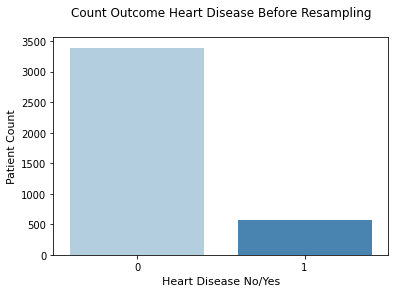

In [0]:
# checking if target column is balanced

sns.countplot(x = 'TenYearCHD', data = cardio, palette = 'Blues')
target_count=cardio['TenYearCHD'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
plt.title('Count Outcome Heart Disease Before Resampling\n')
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.savefig('Balance Heart Disease.png')
plt.show()

oversampling minority data with SMOTE only for train set

In [0]:
smote = SMOTE()
# Resample the train dataset only.
X_train, y_train = smote.fit_resample(X_train, y_train)
print("New number of rows in train set: ", X_train.shape[0])
print ('Shape of oversampled data: {}'.format(X_train.shape))
print ('Shape of Y: {}'.format(y_train.shape))

New number of rows in train set:  5496
Shape of oversampled data: (5496, 14)
Shape of Y: (5496,)


Class 0: 2748
Class 1: 2748
Proportion: 1.0 : 1


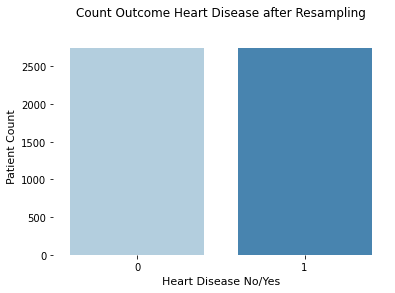

In [0]:
# plot new count
sns.countplot(y_train, palette="Blues")
num_zeros = (y_train == 0).sum()
num_ones = (y_train == 1).sum()
#new_count=y_train.value_counts()
print('Class 0:', num_zeros)
print('Class 1:', num_ones)
print('Proportion:', round(num_zeros / num_ones, 2), ': 1')
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease after Resampling\n')
plt.savefig('Balance Heart Disease.png')
plt.show()

#Random Forest Classifier

In [0]:
master_eval_dict = {}
eval_metrics = ["accuracy", "precision", "recall", "f1"]

Report which parameter gives best result under the grid search procedure for Random Forest Classifier


In [0]:
#find optimym hyperparameters for RF 
rf = sklearn.ensemble.RandomForestClassifier()  
param_grid = { "n_estimators" : [10, 100,1000],  
           "max_depth" : [5, 100,500],  
           "min_samples_leaf" : [1, 20,40],  
           "max_features" : ['auto', 'sqrt', 'log2']}
rf_gscv = GridSearchCV(estimator=rf, param_grid=param_grid ,cv=5) #number of Kfolds=5
rf_gscv.fit(X_train, y_train)#fit training data
print("Tuned hyperparameters:",rf_gscv.best_params_) 
print('Score for the top performing value ',rf_gscv.best_score_*100)

Tuned hyperparameters: {'max_depth': 100, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 1000}
Score for the top performing value  91.33969724542972


Fitting the classifier with the parameters that yielded the best score in the grid search

In [0]:
rf = RandomForestClassifier(**rf_gscv.best_params_)
#  fit on train data with tuned hyperparameters
rf.fit(X_train, y_train)
rf_y_predict = rf.predict(X_val) #prediction on validation set
# Print accuracy on training set 
print("Accuracy on training set :"+str(rf.score(X_train,y_train)*100)) 
#to get score on validation set 
print("Accuracy on val set:",metrics.accuracy_score(y_val,rf_y_predict )*100)
print('Precission on val set:',metrics.precision_score(y_val,rf_y_predict)*100)
print('Recall on val set:',metrics.recall_score(y_val,rf_y_predict)*100)
print('F-score on val set:',metrics.f1_score(y_val,rf_y_predict)*100)

Accuracy on training set :100.0
Accuracy on val set: 79.21348314606742
Precission on val set: 33.33333333333333
Recall on val set: 21.311475409836063
F-score on val set: 26.0


###Classification report on Test set 

In [0]:
#classification report to show differences between class 0 and class 1 
rf_y_predict = rf.predict(X_test)
print('Classification Report:')
print(metrics.classification_report(y_test, rf_y_predict))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       348
           1       0.27      0.25      0.26        48

    accuracy                           0.83       396
   macro avg       0.58      0.58      0.58       396
weighted avg       0.82      0.83      0.82       396



In [0]:
#to zip all results together 
eval_scores = list()

eval_scores.append(metrics.accuracy_score(y_test,rf_y_predict )*100)
eval_scores.append(metrics.precision_score(y_test,rf_y_predict)*100)
eval_scores.append(metrics.recall_score(y_test,rf_y_predict)*100)
eval_scores.append(metrics.f1_score(y_test,rf_y_predict)*100)

rf_metrics_dict = dict(zip(eval_metrics, eval_scores))
rf_metrics_dict

master_eval_dict.update({"RF": rf_metrics_dict})

Confusion Matrix

Text(0.5, 1.1, 'Confusion matrix Random Forest \n')

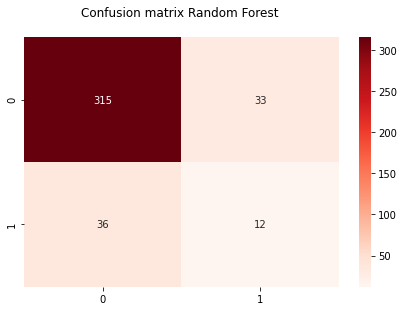

In [0]:
# plotting confusion matrix Random Forest 
cnf_matrix_log = metrics.confusion_matrix(y_test, rf_y_predict)
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Random Forest \n', y=1.1)

Normalized confusion matrix

In [0]:
#normalized confusion matrix
rf_cnf_mx = metrics.confusion_matrix(y_test, rf_y_predict)
print("normalized confusion matrix")
rf_cnf_mx_joint = rf_cnf_mx.astype('float')/ rf_cnf_mx.sum()
print(rf_cnf_mx_joint)

normalized confusion matrix
[[0.79545455 0.08333333]
 [0.09090909 0.03030303]]


ROC curve for Random Forest

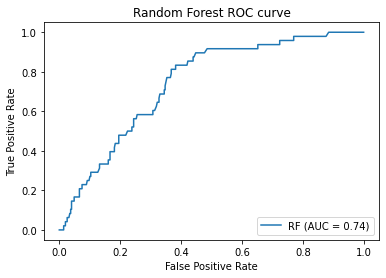

In [0]:
#ROC curve for RF
rf_roc = metrics.plot_roc_curve(rf, X_test, y_test, name = "RF")
plt.title('Random Forest ROC curve')
plt.show()

#Logistic Regression classifier 

Report which parameter gives best result under the grid search procedure for Logistic Regression

In [0]:
#find optimym hyperparameters for Logistic Regression 
log_reg = LogisticRegression(solver='liblinear', max_iter=200)
param_grid = { "penalty" : ["l1", "l2"],
         "C" : np.arange(60,80,2)}
log_reg_gscv = GridSearchCV(estimator=log_reg, param_grid=param_grid ,cv=5) #Kfold value for cross validation is 5
log_reg_gscv.fit(X_train, y_train)#to fit training data
print("Tuned hyperparameters for Logistic Regression:",log_reg_gscv.best_params_) 
print('Score for the top performing value ',log_reg_gscv.best_score_*100)

Tuned hyperparameters for Logistic Regression: {'C': 60, 'penalty': 'l1'}
Score for the top performing value  66.37558110679129


Fitting the classifier with the parameters that yielded the best score in the grid search

In [0]:
#Tuned hyperparameters to test on validation set 
log_reg1 = LogisticRegression(solver='liblinear', max_iter=200, C=64,penalty='l1')
log_reg1.fit(X_train, y_train)
log_reg1_y_predict = log_reg1.predict(X_val) #prediction on validation 
# Print accuracy on training set 
print("Accuracy on training set :"+str(log_reg1.score(X_train,y_train)*100)) 
#to get score on validation set 
print("Accuracy on val set:",metrics.accuracy_score(y_val,log_reg1_y_predict )*100)
print('Precission on val set:',metrics.precision_score(y_val,log_reg1_y_predict)*100)
print('Recall on val set:',metrics.recall_score(y_val,log_reg1_y_predict)*100)
print('F-score on val set:',metrics.f1_score(y_val,log_reg1_y_predict)*100)


Accuracy on training set :66.75764192139738
Accuracy on val set: 66.85393258426966
Precission on val set: 30.344827586206897
Recall on val set: 72.1311475409836
F-score on val set: 42.71844660194174


###Classification report on Test set

In [0]:
#classification report to show differences between class 0 and class 1 
log_reg_y_predict = log_reg1.predict(X_test)
print('Classification Report:')
print(metrics.classification_report(y_test, log_reg_y_predict))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.66      0.77       348
           1       0.21      0.67      0.32        48

    accuracy                           0.66       396
   macro avg       0.57      0.66      0.55       396
weighted avg       0.85      0.66      0.72       396



In [0]:
#to zip all results together
eval_scores = list()

eval_scores.append(metrics.accuracy_score(y_test,log_reg_y_predict )*100)
eval_scores.append(metrics.precision_score(y_test,log_reg_y_predict)*100)
eval_scores.append(metrics.recall_score(y_test,log_reg_y_predict)*100)
eval_scores.append(metrics.f1_score(y_test,log_reg_y_predict)*100)

log_reg1_metrics_dict = dict(zip(eval_metrics, eval_scores))
log_reg1_metrics_dict

master_eval_dict.update({"Log Reg": log_reg1_metrics_dict})

Confusion Matrix for Logistic Regression

Text(0.5, 1.1, 'Confusion matrix Logistic Regression \n')

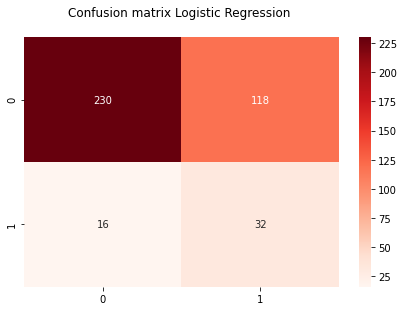

In [0]:
# plotting confusion matrix Logistic Regression 
cnf_matrix_log = metrics.confusion_matrix(y_test, log_reg_y_predict)
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression \n', y=1.1)

Normalized Confusion Matrix 

In [0]:
#normalized confusion matrix
log_reg_cnf_mx = metrics.confusion_matrix(y_test, log_reg_y_predict)
print("normalized confusion matrix")
log_reg_cnf_mx_joint = log_reg_cnf_mx.astype('float')/ log_reg_cnf_mx.sum()
print(log_reg_cnf_mx_joint)

normalized confusion matrix
[[0.58080808 0.2979798 ]
 [0.04040404 0.08080808]]


ROC for Logistic Regression 

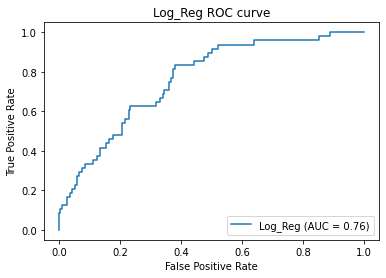

In [0]:
#ROC curve for Log_Reg
log_reg_roc = metrics.plot_roc_curve(log_reg1, X_test, y_test, name = "Log_Reg")
plt.title('Log_Reg ROC curve')
plt.show()

#Support Vector Classifier 

Report which parameter gives best result under the grid search procedure for Support Vector Classifier

In [0]:
#Report which parameter gives best result under the grid search procedure for Support Vector Classifier
svc=svm.SVC(probability=True)
param_grid = [ {'C':[1, 10], 'kernel':['rbf'], 'gamma':[0.1,0.5]},
               {'C':[1, 10], 'kernel':['poly'] ,'gamma':[0.001, 0.0001]} ]
# Create a classifier object with the classifier and parameter candidates
svc_gscv = GridSearchCV(svc, param_grid=param_grid,cv=5) #Kfold is 5 
svc_gscv.fit(X_train, y_train) #fit training data
print("Tuned hyperparameters for svc:",svc_gscv.best_params_) 
print("Accuracy on training set :"+str(svc_gscv.score(X_train,y_train)*100))

Tuned hyperparameters for svc: {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
Accuracy on training set :99.745269286754


Fitting the classifier with the parameters that yielded the best score in the grid search.

In [0]:
#Tuned hyperparameters to test on validation set 
svc= svm.SVC(**svc_gscv.best_params_,probability=True)
svc.fit(X_train, y_train)#fit training data with optimal parameters
svc_y_predict = svc.predict(X_val) #prediction on validation 
# Print accuracy on training set 
print("Accuracy on training set :"+str(svc.score(X_train,y_train)*100)) 
#to get score on validation set 
print("Accuracy on val set:",metrics.accuracy_score(y_val,svc_y_predict )*100)
print('Precission on val set:',metrics.precision_score(y_val,svc_y_predict)*100)
print('Recall on val set:',metrics.recall_score(y_val,svc_y_predict)*100)
print('F-score on val set:',metrics.f1_score(y_val,svc_y_predict)*100)


Accuracy on training set :99.745269286754
Accuracy on val set: 75.84269662921348
Precission on val set: 22.22222222222222
Recall on val set: 16.39344262295082
F-score on val set: 18.867924528301888


###Classification report on Test set

In [0]:
#classification report to show differences between class 0 and class 1 
svc_y_predict = svc.predict(X_test)
print('Classification Report:')
print(metrics.classification_report(y_test, svc_y_predict))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       348
           1       0.22      0.17      0.19        48

    accuracy                           0.83       396
   macro avg       0.56      0.54      0.55       396
weighted avg       0.81      0.83      0.82       396



In [0]:
#to zip all results togeter
eval_scores = list()

eval_scores.append(metrics.accuracy_score(y_test,svc_y_predict )*100)
eval_scores.append(metrics.precision_score(y_test,svc_y_predict)*100)
eval_scores.append(metrics.recall_score(y_test,svc_y_predict)*100)
eval_scores.append(metrics.f1_score(y_test,svc_y_predict)*100)

svc_metrics_dict = dict(zip(eval_metrics, eval_scores))
svc_metrics_dict

master_eval_dict.update({"SVC": svc_metrics_dict})

Confusion Matrix for Support Vecto Classifier 

Text(0.5, 1.1, 'Confusion matrix Support Vector \n')

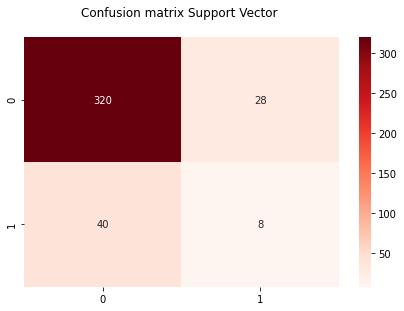

In [0]:
# plotting confusion matrix Support Vector
cnf_matrix_log = metrics.confusion_matrix(y_test,svc_y_predict )
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Support Vector \n', y=1.1)

Normalized confusion matrix

In [0]:
#normalized confusion matrix
svc_cnf_mx = metrics.confusion_matrix(y_test, svc_y_predict)
print("Normalized confusion matrix")
svc_cnf_mx_joint = svc_cnf_mx.astype('float')/ svc_cnf_mx.sum()
print(svc_cnf_mx_joint)

Normalized confusion matrix
[[0.80808081 0.07070707]
 [0.1010101  0.02020202]]


ROC curve for SVC

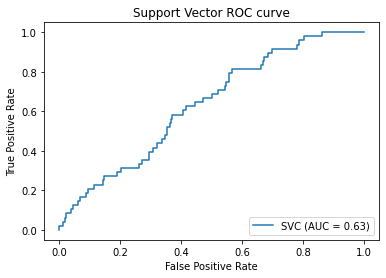

In [0]:
#ROC curve for SVC
svc_roc = metrics.plot_roc_curve(svc, X_test, y_test, name = "SVC")
plt.title('Support Vector ROC curve')
plt.show()

#KNN Classifier 

Report which parameter gives best result under the grid search procedure for KNN Classifier

In [0]:
#Report which parameter gives best result under the grid search 
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 50)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
#fit model to data
knn_gscv.fit( X_train, y_train)
#check top performing n_neighbors value
print('top performing n_neighbors value:',knn_gscv.best_params_)
print("Accuracy on training set :"+str(knn_gscv.score(X_train,y_train)*100)) 

top performing n_neighbors value: {'n_neighbors': 2}
Accuracy on training set :99.47234352256187


Fitting the classifier with the parameters that yielded the best score in the grid search.

In [0]:
#Tuned hyperparameters to test on validation set 
knn = KNeighborsClassifier(**knn_gscv.best_params_)
knn.fit(X_train, y_train)#to fit training set with optimal  parameters 
knn_y_predict = knn.predict(X_val) #prediction on validation 
# Print accuracy on training set 
print("Accuracy on training set :"+str(knn.score(X_train,y_train)*100)) 
#to get score on validation set 
print("Accuracy on val set:",metrics.accuracy_score(y_val,knn_y_predict )*100)
print('Precission on val set:',metrics.precision_score(y_val,knn_y_predict)*100)
print('Recall on val set:',metrics.recall_score(y_val,knn_y_predict)*100)
print('F-score on val set:',metrics.f1_score(y_val,knn_y_predict)*100)

Accuracy on training set :99.47234352256187
Accuracy on val set: 73.03370786516854
Precission on val set: 19.298245614035086
Recall on val set: 18.0327868852459
F-score on val set: 18.644067796610166


###Classification report on Test set

In [0]:
#classification report to show differences between class 0 and class 1 
knn_y_predict = knn.predict(X_test)
print('Classification Report:')
print(metrics.classification_report(y_test, knn_y_predict))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       348
           1       0.18      0.25      0.21        48

    accuracy                           0.77       396
   macro avg       0.53      0.54      0.54       396
weighted avg       0.80      0.77      0.78       396



In [0]:
#to zip results together 
eval_scores = list()

eval_scores.append(metrics.accuracy_score(y_test,knn_y_predict )*100)
eval_scores.append(metrics.precision_score(y_test,knn_y_predict)*100)
eval_scores.append(metrics.recall_score(y_test,knn_y_predict)*100)
eval_scores.append(metrics.f1_score(y_test,knn_y_predict)*100)

knn_metrics_dict = dict(zip(eval_metrics, eval_scores))
knn_metrics_dict

master_eval_dict.update({"KNN": knn_metrics_dict})

####KNN Confusion Matrix 

Text(0.5, 1.1, 'Confusion matrix KNN \n')

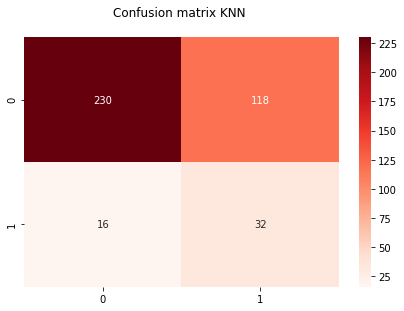

In [0]:
# plotting confusion matrix KNN
cnf_matrix_log = metrics.confusion_matrix(y_test, knn_y_predict)
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix KNN \n', y=1.1)

###normalized confusion matrix

In [0]:
#normalized confusion matrix
knn_cnf_mx = metrics.confusion_matrix(y_test, knn_y_predict)
print("Normalized confusion matrix")
knn_cnf_mx_joint = knn_cnf_mx.astype('float')/ knn_cnf_mx.sum()
print(knn_cnf_mx_joint)

Normalized confusion matrix
[[0.73737374 0.14141414]
 [0.09090909 0.03030303]]


####ROC curve for KNN

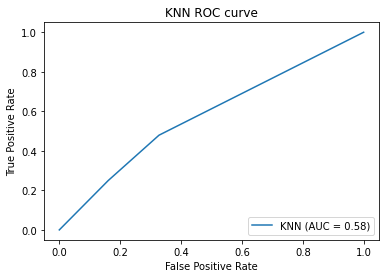

In [0]:
#ROC curve for KNN
knn_roc = metrics.plot_roc_curve(knn, X_test, y_test, name = "KNN")
plt.title('KNN ROC curve')
plt.show()

#Decision Tree Classifier

Report which parameter gives best result under the grid search procedure for Decision Tree

In [0]:
#report which parameter gives best results with grid search
dt = DecisionTreeClassifier()
# Train Decision Tree Classifer
param_grid = {'max_depth': np.arange(2, 11),
               'min_samples_leaf': np.arange(2, 11),
               'criterion':['gini','entropy']}              
dt_gscv = GridSearchCV(dt, param_grid=param_grid, cv=5) #Kfold is 5 
dt_gscv.fit(X_train,y_train)#to fit training set 
print("Tuned hyperparameters:",dt_gscv.best_params_) 
print('Score for the top performing value ',dt_gscv.best_score_*100)

Tuned hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2}
Score for the top performing value  75.21940607163538


In [0]:
dt = DecisionTreeClassifier(**dt_gscv.best_params_)
#  fit on train data with tuned hyperparameters
dt.fit(X_train, y_train)#fir training set with optimal parameters 
dt_y_predict = dt.predict(X_val) #prediction on validation set
# Print accuracy on training set 
print("Accuracy on training set :"+str(dt.score(X_train,y_train)*100)) 
#to get score on validation set 
print("Accuracy on val set:",metrics.accuracy_score(y_val,dt_y_predict )*100)
print('Precission on val set:',metrics.precision_score(y_val,dt_y_predict)*100)
print('Recall on val set:',metrics.recall_score(y_val,dt_y_predict)*100)
print('F-score on val set:',metrics.f1_score(y_val,dt_y_predict)*100)

Accuracy on training set :83.20596797671034
Accuracy on val set: 71.62921348314607
Precission on val set: 25.0
Recall on val set: 32.78688524590164
F-score on val set: 28.368794326241137


###Classification Report on Test set 

In [0]:
#classification report to show differences between class 0 and class 1 
dt_y_predict = dt.predict(X_test)
print('Classification Report:')
print(metrics.classification_report(y_test, dt_y_predict))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       348
           1       0.26      0.50      0.34        48

    accuracy                           0.77       396
   macro avg       0.59      0.65      0.60       396
weighted avg       0.84      0.77      0.79       396



In [0]:
#to zip rezults together
eval_scores = list()

eval_scores.append(metrics.accuracy_score(y_test,dt_y_predict )*100)
eval_scores.append(metrics.precision_score(y_test,dt_y_predict)*100)
eval_scores.append(metrics.recall_score(y_test,dt_y_predict)*100)
eval_scores.append(metrics.f1_score(y_test,dt_y_predict)*100)

dt_metrics_dict = dict(zip(eval_metrics, eval_scores))
dt_metrics_dict

master_eval_dict.update({"DT": dt_metrics_dict})

Confusion Matrix for Decision Tree

Text(0.5, 1.1, 'Confusion matrix Decision Tree \n')

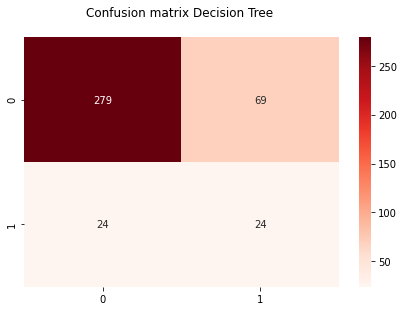

In [0]:
# plotting confusion matrix Decision Tree
cnf_matrix_log = metrics.confusion_matrix(y_test, dt_y_predict)
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Decision Tree \n', y=1.1)

Normalized Confusion Matrix

In [0]:
#normalized confusion matrix
dt_cnf_mx = metrics.confusion_matrix(y_test, dt_y_predict)
print("Normalized confusion matrix")
dt_cnf_mx_joint = dt_cnf_mx.astype('float')/ dt_cnf_mx.sum()
print(dt_cnf_mx_joint)

Normalized confusion matrix
[[0.70454545 0.17424242]
 [0.06060606 0.06060606]]


ROC curve for Decision Tree

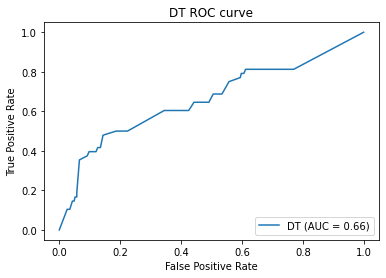

In [0]:
#ROC curve for Decision tree
dt_roc = metrics.plot_roc_curve(dt, X_test, y_test, name = "DT")
plt.title('DT ROC curve')
plt.show()

#Summary

Summary bar plot for each classifier 

In [0]:
master_eval_dict

{'DT': {'accuracy': 76.51515151515152,
  'f1': 34.04255319148936,
  'precision': 25.806451612903224,
  'recall': 50.0},
 'KNN': {'accuracy': 76.76767676767676,
  'f1': 20.689655172413794,
  'precision': 17.647058823529413,
  'recall': 25.0},
 'Log Reg': {'accuracy': 66.16161616161617,
  'f1': 32.32323232323232,
  'precision': 21.333333333333336,
  'recall': 66.66666666666666},
 'RF': {'accuracy': 82.57575757575758,
  'f1': 25.80645161290323,
  'precision': 26.666666666666668,
  'recall': 25.0},
 'SVC': {'accuracy': 82.82828282828282,
  'f1': 19.04761904761905,
  'precision': 22.22222222222222,
  'recall': 16.666666666666664}}

In [0]:
# Convert all metrics for each model to a dataframe.
master_eval_dict_df = pd.DataFrame(master_eval_dict)
master_eval_dict_df["metric"] = eval_metrics
print(master_eval_dict_df.head())

                  RF    Log Reg        SVC        KNN         DT     metric
accuracy   82.575758  66.161616  82.828283  76.767677  76.515152   accuracy
precision  26.666667  21.333333  22.222222  17.647059  25.806452  precision
recall     25.000000  66.666667  16.666667  25.000000  50.000000     recall
f1         25.806452  32.323232  19.047619  20.689655  34.042553         f1


In [0]:
master_eval_dict_long = pd.melt(master_eval_dict_df, 
                                        id_vars = "metric",
                                        var_name = "model",
                                        value_vars = list(master_eval_dict.keys()))
print(master_eval_dict_long.head())

      metric    model      value
0   accuracy       RF  82.575758
1  precision       RF  26.666667
2     recall       RF  25.000000
3         f1       RF  25.806452
4   accuracy  Log Reg  66.161616


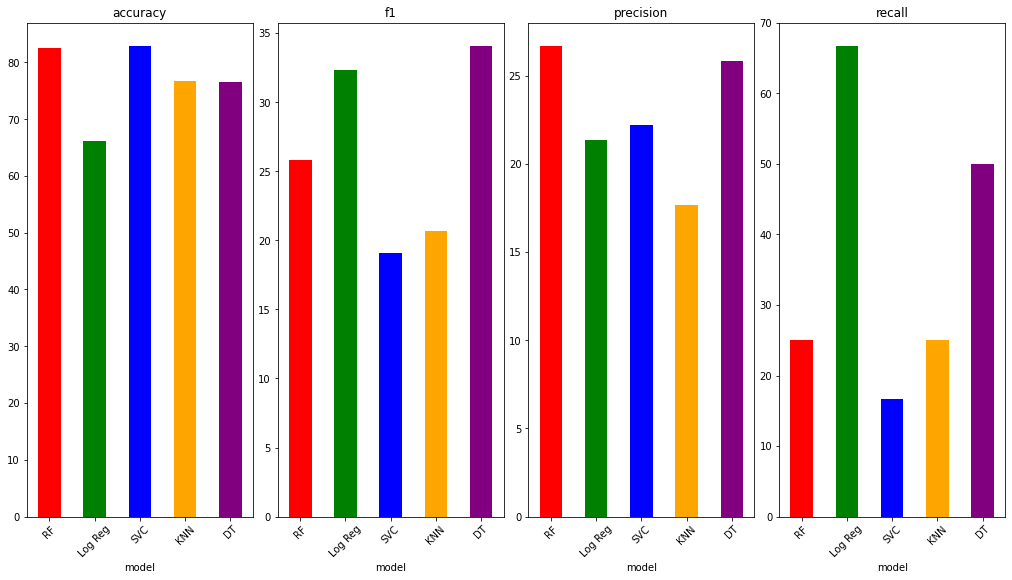

In [0]:
# Create a 2X3 grid.
fig, axes = plt.subplots(1, 4, figsize = (14, 8))
# For each group in a grouped by metric dataframe, assign a metric to an axis object.
for (metric, group), ax in zip(master_eval_dict_long.groupby("metric"), axes.flatten()):
    # Plot each metric as a bar plot.
    group.plot(x = 'model',                                #<- model on x-axis
               y = 'value',                                #<- metric value on y-axis
               kind = 'bar',                               #<- bar plot 
               color = ["red", "green", "blue", "orange","purple"], #<- color for each model
               ax = ax,                                    
               title = metric,                             
               legend = None,                              
               sharex = True)                              
    ax.xaxis.set_tick_params(rotation = 45)               
plt.tight_layout(0.5)   
                                
plt.show()

Summary ROC curve for each classifier 

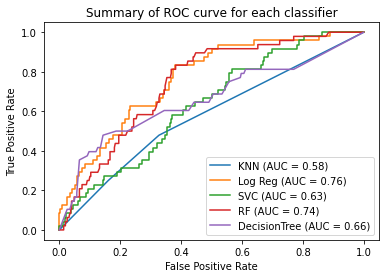

In [0]:
ax = plt.gca()
knn_roc.plot(ax = ax, name = "KNN")
log_reg_roc.plot(ax = ax, name = "Log Reg")
svc_roc.plot(ax = ax, name = "SVC")
rf_roc.plot(ax = ax, name = "RF")
dt_roc.plot(ax=ax,name="DecisionTree")
plt.title('Summary of ROC curve for each classifier')
plt.show()

Table summary with Metrics values for each classifier 

In [0]:
knn=KNeighborsClassifier(**knn_gscv.best_params_)
rf = RandomForestClassifier(**rf_gscv.best_params_)
svc= svm.SVC(**svc_gscv.best_params_,probability=True)
lr=LogisticRegression(**log_reg_gscv.best_params_,solver='liblinear', max_iter=200)
dt=tree = DecisionTreeClassifier(**dt_gscv.best_params_)
# iterations
classifiers = [knn,svc,lr,rf,dt]
names = ['KNN','Support Vector Classifier','Logistic Regression','Random Forest','Decision Tree']
results = []

for name, clf in zip(names, classifiers):
    model = clf.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_predict)*100
    accuracy=round(accuracy,2)
    precision = metrics.precision_score(y_test, y_predict)*100
    precision=round(precision,2)
    recall = metrics.recall_score(y_test, y_predict)*100
    recall=round(recall,2)
    f1_score=metrics.f1_score(y_test, y_predict)*100
    f1_score=round(f1_score,2)
    results.append([name,accuracy,precision,recall,f1_score])
final = pd.DataFrame(results, columns=['Classifier','Accuracy ','Precision','Recall','F1_score'])
final.style.background_gradient(cmap='Pastel1')

,Classifier,Accuracy,Precision,Recall,F1_score
0,KNN,76.770000,17.650000,25.000000,20.690000
1,Support Vector Classifier,82.830000,22.220000,16.670000,19.050000
2,Logistic Regression,66.160000,21.330000,66.670000,32.320000
3,Random Forest,83.330000,29.550000,27.080000,28.260000
4,Decision Tree,68.940000,21.370000,58.330000,31.280000
